In [1]:
import sys
from os.path import *
import os

from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

from pylab import figure, cm


import astropy.time
import astropy.units as u
from astropy.coordinates import get_sun

import sunpy.map
from sunpy import sun

import numpy as np
%matplotlib inline

/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/glymur/config.py:171: UserWarning: Neither the openjp2 nor the openjpeg library could be loaded.  
  warnings.warn(msg)


/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


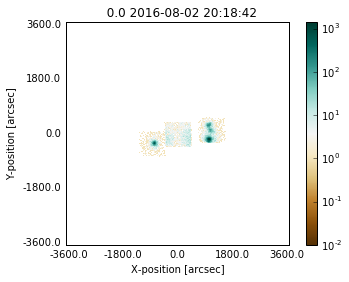

In [35]:
infile='data/Sol_16208/20201005001/event_cl/nu20201005001A06_chu3_N_cl_sunpos_map.fits'
disk_center = sunpy.map.Map(infile)
infile='data/Sol_16208/20201001001/event_cl/nu20201001001A06_chu3_N_cl_sunpos_map.fits'
west_limb=sunpy.map.Map(infile)
infile='data/Sol_16208/20201001001/event_cl/nu20201001001A06_chu3_N_cl_sunpos_map.fits'
west_limb=sunpy.map.Map(infile)

infile='data/Sol_16208/20201006001/event_cl/nu20201006001A06_chu3_N_cl_sunpos_map.fits'
east_limb=sunpy.map.Map(infile)



west_limb.plot_settings['norm'] = colors.LogNorm(0.01, west_limb.max())
west_limb.plot_settings['cmap'] = cm.get_cmap('BrBG')
total = west_limb
total.data = west_limb.data+disk_center.data+east_limb.data



/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:243: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:245: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:243: Warning: Missing metadata for heliographic latitude: 

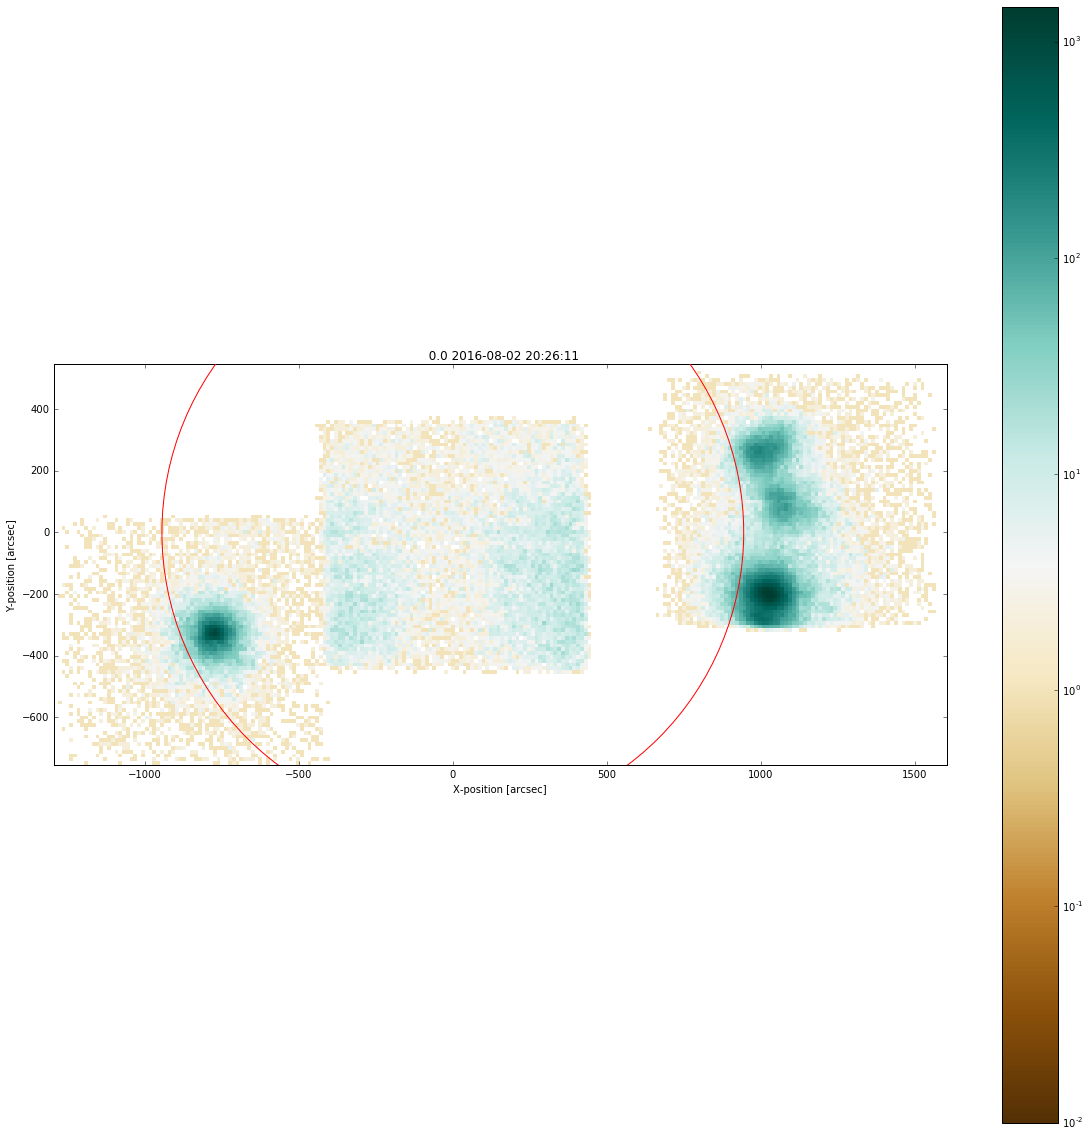

In [39]:
rangex = u.Quantity([-1300*u.arcsec, 1600 * u.arcsec])
rangey = u.Quantity([-750 * u.arcsec, 550 * u.arcsec])

nustar_submap = total.submap(rangex, rangey)

plt.subplots(figsize=(20, 20))
nustar_submap.plot()
plt.colorbar()
nustar_submap.draw_limb(color='r')


plt.savefig('quicklook_map.png', bbox_inches='tight')